In [56]:
#Importing our dataset from csv file
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data) :
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [53]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Age","Fare","PassengerId","Parch","Pclass"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treez = tree.DecisionTreeClassifier()  
treez.fit(x_train, y_train)   #fitting our model
y_pred=treez.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


In [54]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Age","Fare","PassengerId","Sex","SibSp"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treez = tree.DecisionTreeClassifier()  
treez.fit(x_train, y_train)   #fitting our model
y_pred=treez.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7374301675977654


[Text(837.0, 978.48, 'Sex <= 0.5\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(418.5, 761.0400000000001, 'SibSp <= 2.5\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(167.4, 543.6, 'SibSp <= 0.5\ngini = 0.361\nsamples = 33.3%\nvalue = [0.236, 0.764]'),
 Text(83.7, 326.1600000000001, 'gini = 0.335\nsamples = 19.8%\nvalue = [0.213, 0.787]'),
 Text(251.10000000000002, 326.1600000000001, 'SibSp <= 1.5\ngini = 0.395\nsamples = 13.5%\nvalue = [0.271, 0.729]'),
 Text(167.4, 108.72000000000003, 'gini = 0.395\nsamples = 11.9%\nvalue = [0.271, 0.729]'),
 Text(334.8, 108.72000000000003, 'gini = 0.397\nsamples = 1.5%\nvalue = [0.273, 0.727]'),
 Text(669.6, 543.6, 'SibSp <= 6.0\ngini = 0.391\nsamples = 2.1%\nvalue = [0.733, 0.267]'),
 Text(585.9, 326.1600000000001, 'SibSp <= 3.5\ngini = 0.444\nsamples = 1.7%\nvalue = [0.667, 0.333]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.444\nsamples = 0.8%\nvalue = [0.667, 0.333]'),
 Text(669.6, 108.720000000000

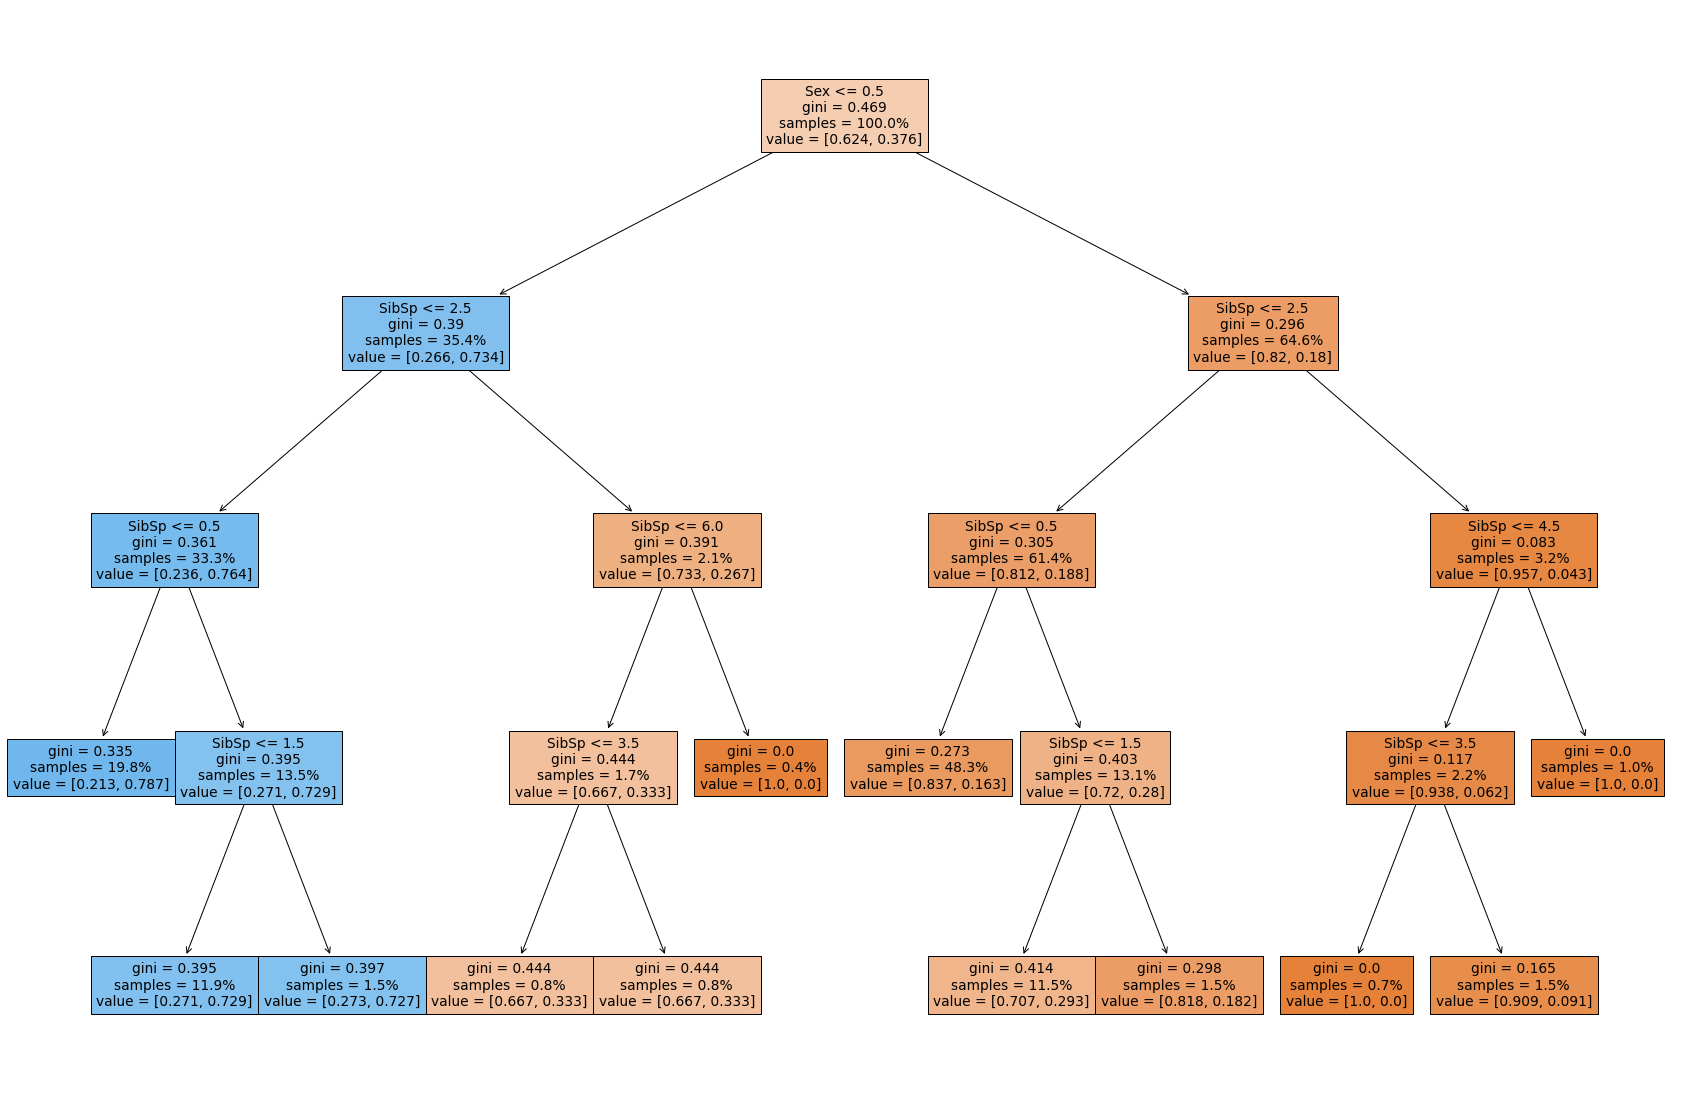

In [39]:
plt.figure(figsize=(30,20))
plot_tree (treez,filled=True,feature_names=x.columns,proportion=True)

# based on this Decision Tree  most of the females survived while most of the males didn't 
## this tree we icluded Sex and SibSp

[Text(837.0, 996.6, 'Pclass <= 2.5\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(465.0, 815.4000000000001, 'Pclass <= 1.5\ngini = 0.497\nsamples = 44.5%\nvalue = [0.461, 0.539]'),
 Text(279.0, 634.2, 'Parch <= 3.0\ngini = 0.469\nsamples = 24.7%\nvalue = [0.375, 0.625]'),
 Text(186.0, 453.0, 'Parch <= 0.5\ngini = 0.467\nsamples = 24.6%\nvalue = [0.371, 0.629]'),
 Text(93.0, 271.79999999999995, 'gini = 0.481\nsamples = 18.1%\nvalue = [0.403, 0.597]'),
 Text(279.0, 271.79999999999995, 'Parch <= 1.5\ngini = 0.405\nsamples = 6.5%\nvalue = [0.283, 0.717]'),
 Text(186.0, 90.59999999999991, 'gini = 0.428\nsamples = 4.1%\nvalue = [0.31, 0.69]'),
 Text(372.0, 90.59999999999991, 'gini = 0.36\nsamples = 2.4%\nvalue = [0.235, 0.765]'),
 Text(372.0, 453.0, 'gini = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]'),
 Text(651.0, 634.2, 'Parch <= 0.5\ngini = 0.491\nsamples = 19.8%\nvalue = [0.567, 0.433]'),
 Text(558.0, 453.0, 'gini = 0.456\nsamples = 15.2%\nvalue = [0.648, 0.352]'),
 Text(7

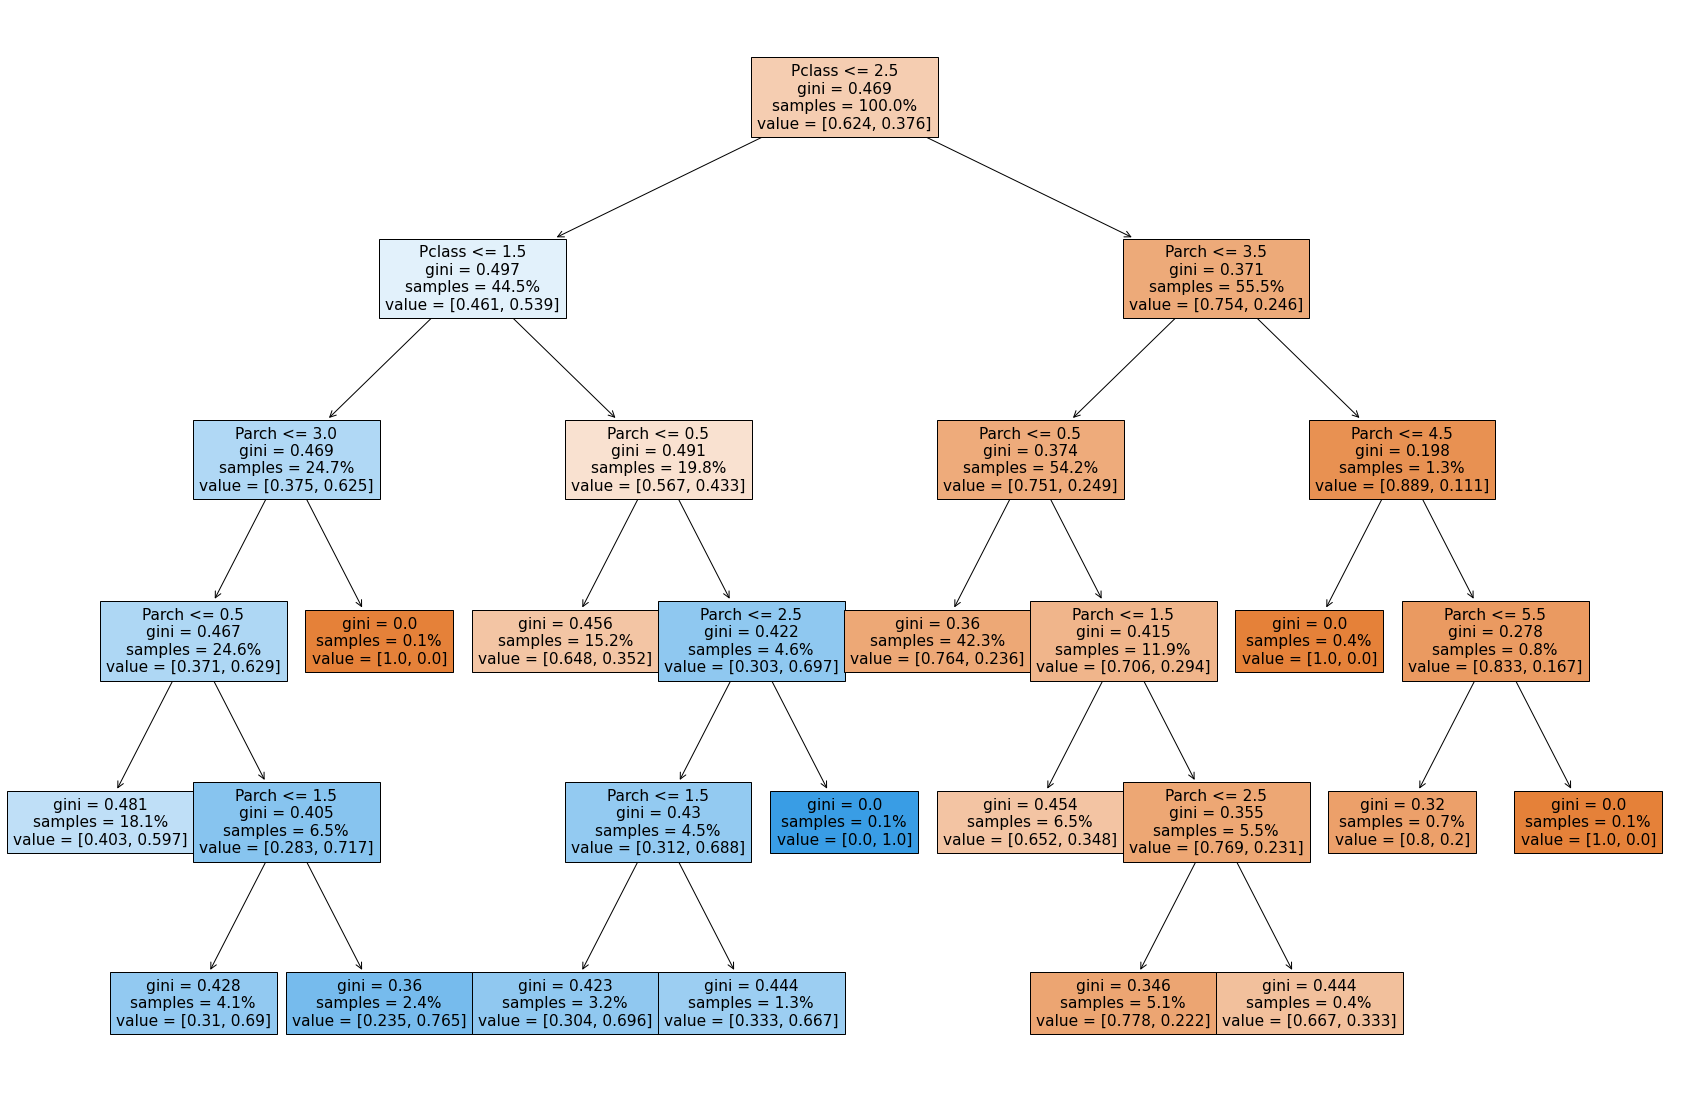

In [52]:
plt.figure(figsize=(30,20))
plot_tree (treez,filled=True,feature_names=x.columns,proportion=True)

## this tree we icluded Parch and Pclass

# With Sex and SibSp we get 0.7877094972067039 


# With Parch and Pclass we get  0.7374301675977654

In [68]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Fare"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8059701492537313


# With 10 Estimators Accuracy: 0.8059701492537313


In [72]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7985074626865671


# With 100 Estimators Accuracy: 0.7985074626865671